C:\Users\joyji\AppData\Local\Temp\ipykernel_316\2598672004.py:10: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ais_data = pd.read_csv("final/cleaned_AIS_data.csv")  # Replace with your AIS data file path


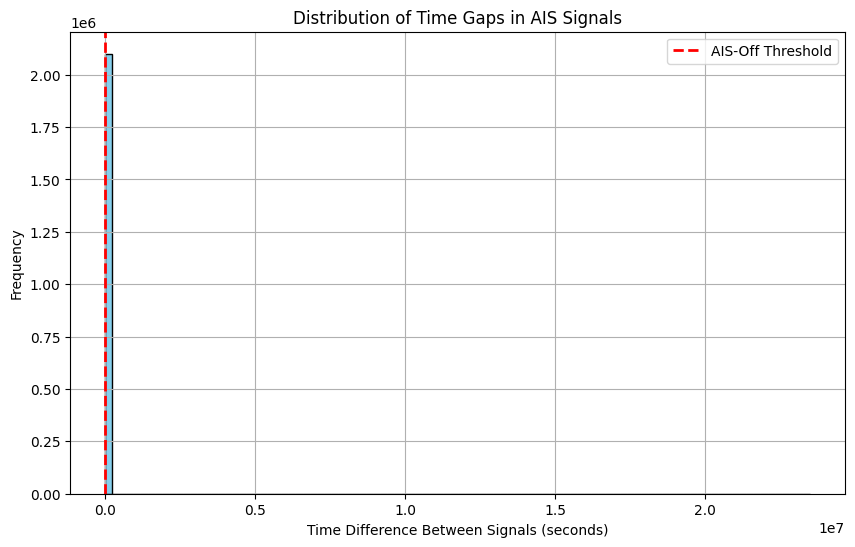

Model Accuracy: 99.08%


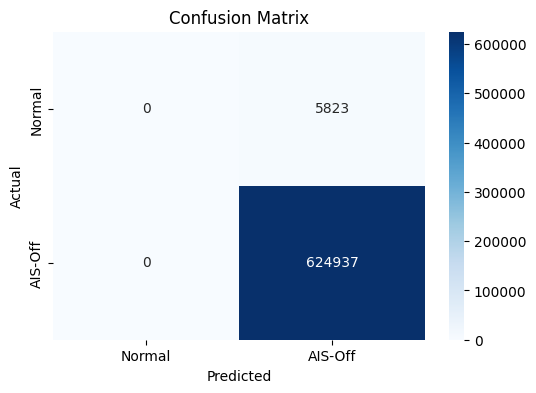

KeyboardInterrupt: 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load AIS Data
ais_data = pd.read_csv("final/cleaned_AIS_data.csv")  # Replace with your AIS data file path

# Step 2: Preprocessing
# Convert BaseDateTime to datetime format
ais_data['BaseDateTime'] = pd.to_datetime(ais_data['BaseDateTime'])

# Sort by MMSI and timestamp
ais_data.sort_values(by=['MMSI', 'BaseDateTime'], inplace=True)

# Step 3: Calculate Time Gaps Between AIS Signals
ais_data['time_diff'] = ais_data.groupby('MMSI')['BaseDateTime'].diff().dt.total_seconds()

# Step 4: Label AIS-Off Events (Gaps > 600 seconds)
ais_off_threshold = 60  
ais_data['ais_off'] = ais_data['time_diff'] > ais_off_threshold

# Step 5: Visualize Time Gaps
plt.figure(figsize=(10, 6))
ais_data['time_diff'].hist(bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Time Difference Between Signals (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Gaps in AIS Signals')
plt.axvline(ais_off_threshold, color='red', linestyle='dashed', linewidth=2, label='AIS-Off Threshold')
plt.legend()
plt.show()

# Step 6: Prepare Features for ML Model
features = ['LAT', 'LON', 'SOG', 'COG', 'Heading']  # Added 'Heading' as a feature
X = ais_data[features].fillna(0)
y = ais_data['ais_off'].astype(int)  # 1 for AIS-off, 0 for normal

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train MLP Classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), solver='adam', max_iter=500, random_state=42)
clf.fit(X_train, y_train)

# Step 9: Evaluation
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'AIS-Off'], yticklabels=['Normal', 'AIS-Off'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Visualization of Vessel Tracks with AIS-Off Events
import folium

# Create a base map centered around the mean location
map_center = [ais_data['LAT'].mean(), ais_data['LON'].mean()]
m = folium.Map(location=map_center, zoom_start=8)

# Plot vessel tracks
for _, row in ais_data.iterrows():
    color = 'red' if row['ais_off'] else 'blue'
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=2,
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Save the map
m.save('vessel_tracks_ais_off.html')
print("Interactive vessel track map with AIS-Off events saved as 'vessel_tracks_ais_off.html'")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Anomaly_Detection_Architecture.png'

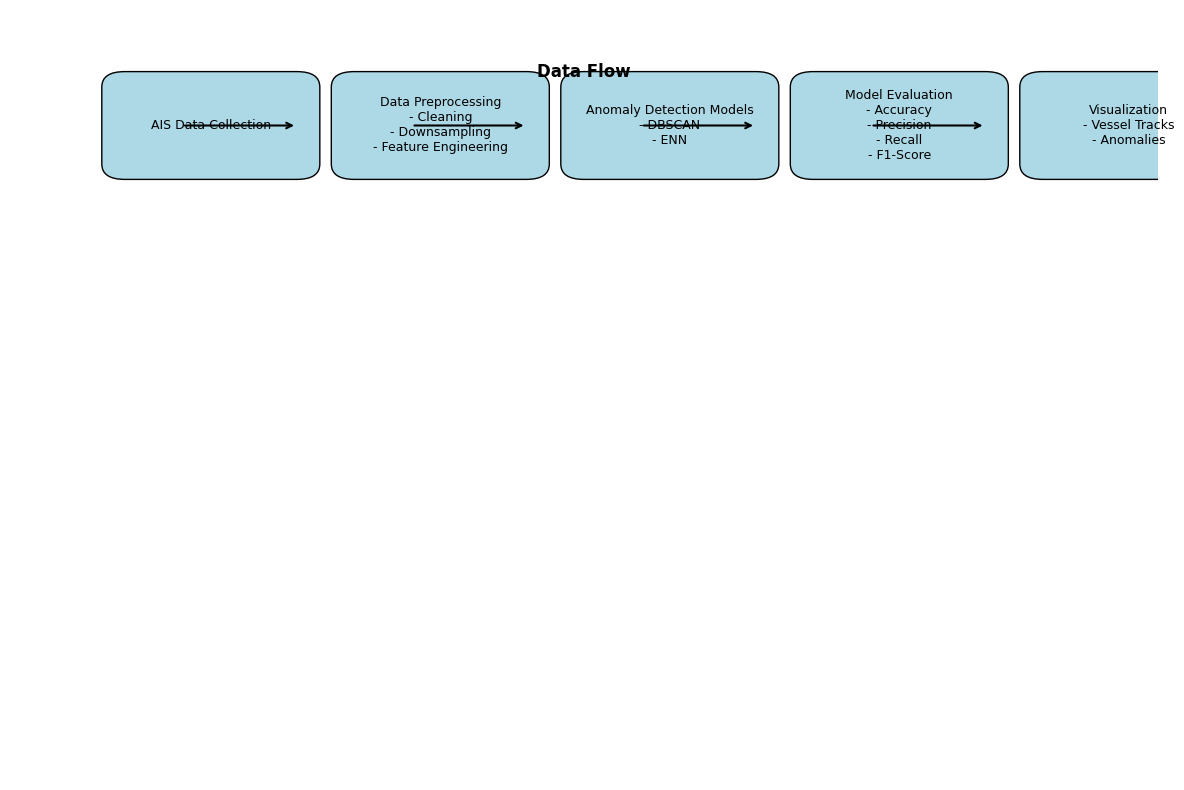

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Initialize the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define components
components = {
    "AIS Data Collection": (0.1, 0.8),
    "Data Preprocessing\n- Cleaning\n- Downsampling\n- Feature Engineering": (0.3, 0.8),
    "Anomaly Detection Models\n- DBSCAN\n- ENN": (0.5, 0.8),
    "Model Evaluation\n- Accuracy\n- Precision\n- Recall\n- F1-Score": (0.7, 0.8),
    "Visualization\n- Vessel Tracks\n- Anomalies": (0.9, 0.8)
}

# Draw boxes for components
for label, (x, y) in components.items():
    ax.add_patch(mpatches.FancyBboxPatch((x, y), 0.15, 0.1,
                                         boxstyle="round,pad=0.02", edgecolor="black", facecolor="lightblue"))
    ax.text(x + 0.075, y + 0.05, label, ha='center', va='center', fontsize=9, wrap=True)

# Draw arrows between components
arrow_props = dict(arrowstyle="->", color='black', lw=1.5)
ax.annotate("", xy=(0.25, 0.85), xytext=(0.15, 0.85), arrowprops=arrow_props)
ax.annotate("", xy=(0.45, 0.85), xytext=(0.35, 0.85), arrowprops=arrow_props)
ax.annotate("", xy=(0.65, 0.85), xytext=(0.55, 0.85), arrowprops=arrow_props)
ax.annotate("", xy=(0.85, 0.85), xytext=(0.75, 0.85), arrowprops=arrow_props)

# Add Data Flow label
ax.text(0.5, 0.92, "Data Flow", ha='center', va='center', fontsize=12, fontweight='bold')

# Hide axes
ax.axis('off')

# Save and display the diagram
plt.tight_layout()
plt.savefig('/mnt/data/Anomaly_Detection_Architecture.png')
plt.show()
